In [880]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sklearn
import ML_Utils
from ML_Utils import *
import importlib
importlib.reload(ML_Utils)

<module 'ML_Utils' from '/mnt/c/Users/Rajan/Desktop/Tech_Projects/ML_projects/ML_Utils/ML_Utils.py'>

In [767]:
os.chdir('/mnt/c/Users/Rajan/Desktop/Tech_Projects/ML_projects/ML_Utils')
os.getcwd()

'/mnt/c/Users/Rajan/Desktop/Tech_Projects/ML_projects/ML_Utils'

In [768]:
df_origin_nyc = pd.read_csv('data/nyc_energy_raw.csv')
df_nyc = df_origin_nyc

In [769]:
#df_nyc.describe()

In [770]:
#df_nyc.info()

In [771]:
#get_nan_percents(df_origin_nyc), df_origin_nyc.shape

In [772]:
#drop columns with more than 10% of missing data
drop_columns_with_na_threshold(df_nyc,10)
df_nyc.shape

(11746, 54)

In [773]:
#drop rows with more than 10% of missing data
drop_rows_with_na_threshold(df_nyc,10)
df_nyc.shape

(11706, 54)

In [774]:
#get_nan_percents(df_nyc)

In [775]:
#Fill na for numericc columns with columns means
fill_numeric_na_with_column_means(df_nyc)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,0,0,0,179694,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11740,14987,4940405,Advanced: 161 Henry Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002370008,3-00237-0008\t,3001882,161 Henry Street,Not Available,...,244.2,173.2,71,53665,5122.8,95.46,108.6,04/26/2017 11:20:06 AM,NaN,NaN
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,24 Monroe Place,Not Available,...,354.7,275.1,79.6,74177,2308.5,31.12,109.6,04/26/2017 11:20:06 AM,NaN,NaN
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,150 Joralemon Street,Not Available,...,674.6,499.7,175,101291,4216.8,41.63,153.4,04/26/2017 11:20:06 AM,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,Not Available,...,247.8,196.2,51.7,60715,1687.6,27.8,92.7,04/26/2017 11:20:06 AM,NaN,NaN


In [776]:
#get_nan_percents(df_nyc)

In [777]:
#df_nyc.dtypes

In [778]:
#convert Borough from object to category
df_nyc = df_nyc.astype({"Borough":'category'})

In [779]:
# convert and drop categorical features into one hot encodings
convert_categorical_features_to_numerical(df_nyc)[0].shape

(11706, 58)

In [780]:
#remove_quantile_outliers_from_all_columns(df_nyc, 0.01, 0.99)[1]

In [781]:
# for numeric cols drop rows with outliers beyond 1 to 99 quantile
df = df_nyc
df = remove_quantile_outliers_from_all_columns(df, 0.01, 0.99)

In [782]:
df_nyc.shape, df.shape

((11706, 54), (25, 54))

In [783]:
# for numeric cols drop rows with outliers beyond zscores of 3
df = df_nyc
df = remove_zscore_outliers_from_all_columns(df, 3)

In [784]:
df.shape

(11290, 54)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²)
Order,1.000000,0.058104,-0.158415,0.148822,0.067848,0.048783,-0.154254
Property Id,0.058104,1.000000,-0.085786,0.067909,0.000107,-0.126056,-0.080955
DOF Gross Floor Area,-0.158415,-0.085786,1.000000,0.102775,0.058480,-0.021156,0.808643
Year Built,0.148822,0.067909,0.102775,1.000000,0.012443,0.002185,0.102950
Number of Buildings - Self-reported,0.067848,0.000107,0.058480,0.012443,1.000000,0.008372,0.078653
Occupancy,0.048783,-0.126056,-0.021156,0.002185,0.008372,1.000000,-0.036164
Property GFA - Self-Reported (ft²),-0.154254,-0.080955,0.808643,0.102950,0.078653,-0.036164,1.000000


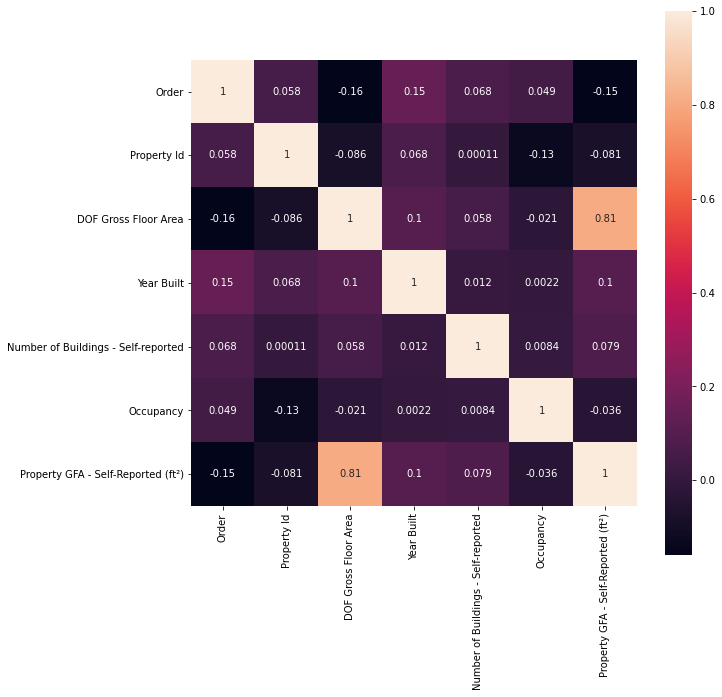

In [785]:
show_correlations(df_nyc)

In [786]:
corrMatrix = df_nyc.corr()
corrMatrix

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²)
Order,1.000000,0.058104,-0.158415,0.148822,0.067848,0.048783,-0.154254
Property Id,0.058104,1.000000,-0.085786,0.067909,0.000107,-0.126056,-0.080955
DOF Gross Floor Area,-0.158415,-0.085786,1.000000,0.102775,0.058480,-0.021156,0.808643
Year Built,0.148822,0.067909,0.102775,1.000000,0.012443,0.002185,0.102950
Number of Buildings - Self-reported,0.067848,0.000107,0.058480,0.012443,1.000000,0.008372,0.078653
Occupancy,0.048783,-0.126056,-0.021156,0.002185,0.008372,1.000000,-0.036164
Property GFA - Self-Reported (ft²),-0.154254,-0.080955,0.808643,0.102950,0.078653,-0.036164,1.000000


In [787]:
#get DF values using index, column names
corrMatrix.loc[['Order'], ['Property Id']].values[0][0], corrMatrix.iloc[0,1]

(0.05810419319497881, 0.05810419319497881)

In [788]:
#get values along with index, column names
corrMatrix.loc[:,['Order', 'Property Id']] 

,Order,Property Id
Order,1.000000,0.058104
Property Id,0.058104,1.000000
DOF Gross Floor Area,-0.158415,-0.085786
Year Built,0.148822,0.067909
Number of Buildings - Self-reported,0.067848,0.000107
Occupancy,0.048783,-0.126056
Property GFA - Self-Reported (ft²),-0.154254,-0.080955


In [789]:
#get column values from DF
corrMatrix.iloc[1,:]

Order                                  0.058104
Property Id                            1.000000
DOF Gross Floor Area                  -0.085786
Year Built                             0.067909
Number of Buildings - Self-reported    0.000107
Occupancy                             -0.126056
Property GFA - Self-Reported (ft²)    -0.080955
Name: Property Id, dtype: float64

In [790]:
#Get row and column index names from DF's indices
corrMatrix.index[3], corrMatrix.columns[2]

('Year Built', 'DOF Gross Floor Area')

In [791]:
#get list of correlated features
get_correlated_features(df_nyc, 0.5)

[['DOF Gross Floor Area', 'Property GFA - Self-Reported (ft²)'],
 ['Property GFA - Self-Reported (ft²)', 'DOF Gross Floor Area']]

In [881]:
#Remove correlated features
df_numeric_without_correlated_features, discarded_cols = remove_correlated_features(df_nyc, 0.5)
print(discarded_cols)

['Property GFA - Self-Reported (ft²)']


In [882]:
df_numeric_without_correlated_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11706 entries, 0 to 11745
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order                                11706 non-null  int64  
 1   Property Id                          11706 non-null  int64  
 2   DOF Gross Floor Area                 11706 non-null  float64
 3   Year Built                           11706 non-null  int64  
 4   Number of Buildings - Self-reported  11706 non-null  int64  
 5   Occupancy                            11706 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 640.2 KB
